In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Figure size 720x540 with 0 Axes>

In [2]:
from sklearn.utils import resample

In [3]:
back = pd.read_csv('Data_of_Attack_Back.csv')
back_bufferoverflow = pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
ftp_write = pd.read_csv('Data_of_Attack_Back_FTPWrite.csv')
guess_password = pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
neptune = pd.read_csv('Data_of_Attack_Back_Neptune.csv')
nmap = pd.read_csv('Data_of_Attack_Back_NMap.csv')
normal = pd.read_csv('Data_of_Attack_Back_Normal.csv')
portsweep= pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
rootkit = pd.read_csv('Data_of_Attack_Back_RootKit.csv')
satan = pd.read_csv('Data_of_Attack_Back_Satan.csv')
smurf = pd.read_csv('Data_of_Attack_Back_Smurf.csv')

In [4]:
ftp_write.columns = ['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate']

In [6]:
##Assigning codes to different classes
back['attack'] = 1
back_bufferoverflow['attack'] = 2
ftp_write['attack'] = 3
guess_password['attack'] = 4
neptune['attack'] = 5
nmap['attack'] = 6
normal['attack'] = 0
portsweep['attack'] = 7
rootkit['attack'] = 8
satan['attack'] = 9
smurf['attack'] = 10

In [21]:
##Resampling
back_r = resample(back, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
back_bufferoverflow_r= resample(back_bufferoverflow, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
ftp_write_r = resample(ftp_write, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
guess_password_r = resample(guess_password, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
neptune_r = resample(neptune, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
nmap_r = resample(nmap, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
normal_r = resample(normal, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
portsweep_r = resample(portsweep, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
rootkit_r = resample(rootkit, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)
satan_r = resample(satan, replace = True, n_samples = len(smurf), random_state = 27).reset_index(drop = True)


In [24]:
df = pd.concat([back_r,back_bufferoverflow_r,ftp_write_r,guess_password_r,neptune_r,nmap_r,normal_r,portsweep_r,rootkit_r,satan_r,smurf])

In [27]:
df = df.reset_index(drop = True)

In [28]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.020,0.100,0.000,0.005,0.0,0.0,0.0,0.010,0.010,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.255,0.100,0.000,0.000,0.0,0.0,0.0,0.005,0.005,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.071,0.100,0.000,0.001,0.0,0.0,0.0,0.020,0.020,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.133,0.100,0.000,0.001,0.0,0.0,0.0,0.002,0.002,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.055,0.100,0.000,0.002,0.0,0.0,0.0,0.022,0.022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.000,0.000,10
33073,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.000,0.000,10
33074,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.000,0.000,10
33075,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.000,0.000,10


In [29]:
df.attack.value_counts()

10    3007
9     3007
8     3007
7     3007
6     3007
5     3007
4     3007
3     3007
2     3007
1     3007
0     3007
Name: attack, dtype: int64

In [30]:
#type conversion
df[' protocol_type'] = df[' protocol_type'].astype(str)
df[' service'] = df[' service'].astype(str)
df[' flag'] = df[' flag'].astype(str)

In [31]:
#Separating numerical and categorical variables
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [32]:
df_num = df[numeric_var_names]
df_cat = df[cat_var_names]

In [33]:
df_y = df_num['attack'].reset_index(drop = True)

In [34]:
del df_num['attack']

In [35]:
#Missing vlaue treatment for numerical variable
def missings_treat(x):
    x = x.fillna(x.median())
    return x

In [36]:
df_num= df_num.apply(lambda x: missings_treat(x))

In [37]:
#Missing value treatment for categorical variable
def missings_treat(y):
    y = y.fillna(y.mode()[0])
    return y

In [38]:
df_cat= df_cat.apply(lambda y: missings_treat(y))

In [39]:
df_num.isnull().sum()

duration                        0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate                  0
 srv_diff_host_rate             0
 dst_host_count                 0
 dst_host_srv_

In [40]:
df_cat.isnull().sum()

 protocol_type    0
 service          0
 flag             0
dtype: int64

<AxesSubplot:>

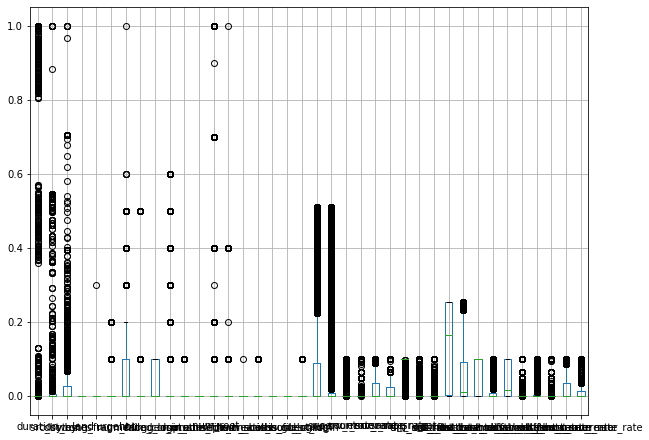

In [41]:
#Handling Outliers
df_num.plot(kind = 'box')

In [42]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.95))
    x = x.clip(lower = x.quantile(0.05))
    return x

In [43]:
df_num= df_num.apply(lambda x: outlier_capping(x))

## Encoding 

In [44]:
## Dummy variable creation for nominal variables
df_cat = pd.get_dummies(df_cat, drop_first=True).reset_index(drop = True)

In [104]:
df_cat

,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.03,service_0.04,service_0.05,service_0.06,service_0.07,service_0.08,...,flag_0.01,flag_0.02,flag_0.03,flag_0.04,flag_0.05,flag_0.06,flag_0.07,flag_0.08,flag_0.09,flag_0.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33073,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33074,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33075,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_treated = pd.concat([df_cat,df_num,df_y],axis=1).reset_index(drop = True)

In [49]:
df_treated

,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.03,service_0.04,service_0.05,service_0.06,service_0.07,service_0.08,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,0,0,0,0,0,0,0,0,...,0.020,0.100,0.000,0.005,0.0,0.0,0.0,0.010,0.010,1
1,0,0,0,0,0,0,0,0,0,0,...,0.255,0.100,0.000,0.000,0.0,0.0,0.0,0.005,0.005,1
2,0,0,0,0,0,0,0,0,0,0,...,0.071,0.100,0.000,0.001,0.0,0.0,0.0,0.020,0.020,1
3,0,0,0,0,0,0,0,0,0,0,...,0.133,0.100,0.000,0.001,0.0,0.0,0.0,0.002,0.002,1
4,0,0,0,0,0,0,0,0,0,0,...,0.055,0.100,0.000,0.002,0.0,0.0,0.0,0.022,0.022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,0,1,0,0,0,0,0,0,0,0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.000,0.000,10
33073,0,1,0,0,0,0,0,0,0,0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.000,0.000,10
33074,0,1,0,0,0,0,0,0,0,0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.000,0.000,10
33075,0,1,0,0,0,0,0,0,0,0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.000,0.000,10


## Variable reduction 

In [53]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
X = df_treated[df_treated.columns.difference(['attack'])]
y = df_treated[['attack']]

rfe = RFE(RandomForestClassifier(), 25)
rfe = rfe.fit(X, y)

X.columns[rfe.get_support()]

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Index([' count', ' diff_srv_rate', ' dst_bytes', ' dst_host_count',
       ' dst_host_diff_srv_rate', ' dst_host_rerror_rate',
       ' dst_host_same_src_port_rate', ' dst_host_same_srv_rate',
       ' dst_host_serror_rate', ' dst_host_srv_count',
       ' dst_host_srv_diff_host_rate', ' dst_host_srv_rerror_rate',
       ' dst_host_srv_serror_rate', ' hot', ' num_failed_logins',
       ' protocol_type_0.01', ' protocol_type_0.02', ' rerror_rate',
       ' same_srv_rate', ' serror_rate', ' service_0.05', ' service_0.09',
       ' src_bytes', ' srv_count', 'duration'],
      dtype='object')

In [54]:
#SelectKbest
from sklearn.feature_selection import SelectKBest, f_classif
SKB = SelectKBest(f_classif, k=25).fit(X, y )

X.columns[SKB.get_support()]

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 24  25  26  28  32  34 109 110 111] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index([' count', ' diff_srv_rate', ' dst_bytes', ' dst_host_count',
       ' dst_host_rerror_rate', ' dst_host_same_src_port_rate',
       ' dst_host_same_srv_rate', ' dst_host_serror_rate',
       ' dst_host_srv_count', ' dst_host_srv_rerror_rate', ' flag_0.06',
       ' flag_0.07', ' hot', ' logged_in', ' num_failed_logins',
       ' protocol_type_0.02', ' rerror_rate', ' same_srv_rate', ' serror_rate',
       ' service_0.05', ' service_0.06', ' service_0.09', ' src_bytes',
       ' srv_count', ' srv_rerror_rate'],
      dtype='object')

In [55]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [56]:
VIF = pd.Series(VIF, name='VIF')

In [57]:
cols = pd.Series(X.columns, name='Column_Name')

In [58]:
VIF_res = pd.concat([cols,VIF],axis=1)

In [59]:
VIF_10 = VIF_res.sort_values(by=['VIF'], ascending = False).head(20)

In [60]:
VIF_10

,Column_Name,VIF
46,service_0.06,inf
49,service_0.09,inf
36,protocol_type_0.02,inf
51,service_0.11,inf
107,srv_error_rate,299.320021
12,dst_host_srv_serror_rate,155.145981
19,flag_0.07,119.760581
108,srv_rerror_rate,91.495758
37,rerror_rate,59.658392
11,dst_host_srv_rerror_rate,57.306427


### Final List 

In [61]:
final_imp_features = {' count', ' diff_srv_rate', ' dst_bytes', ' dst_host_count',
       ' dst_host_diff_srv_rate', ' dst_host_rerror_rate',
       ' dst_host_same_src_port_rate', ' dst_host_same_srv_rate',
       ' dst_host_serror_rate', ' dst_host_srv_count',
       ' dst_host_srv_diff_host_rate', ' dst_host_srv_rerror_rate',
        ' hot', ' num_failed_logins',' flag_0.06',' logged_in',
       ' protocol_type_0.01', ' rerror_rate',
       ' same_srv_rate', ' serror_rate', ' service_0.05',
       ' src_bytes', ' srv_count', 'duration',' srv_rerror_rate'}

In [62]:
imp_features = list(final_imp_features)

In [63]:
df_final_X = df_treated[imp_features]

In [64]:
df_final_X.head()

,dst_host_same_src_port_rate,rerror_rate,service_0.05,flag_0.06,src_bytes,serror_rate,dst_host_count,hot,dst_bytes,same_srv_rate,...,dst_host_rerror_rate,diff_srv_rate,dst_host_serror_rate,dst_host_srv_rerror_rate,protocol_type_0.01,srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,duration,dst_host_srv_count
0,0.005,0.020,0,0,0.5454,0.0,0.020,0.2,0.08314,0.1,...,0.010,0.0,0.0,0.010,0,0.005,0.1,0.0,0.0,0.020
1,0.000,0.050,0,0,0.5454,0.0,0.255,0.2,0.08314,0.1,...,0.005,0.0,0.0,0.005,0,0.003,0.1,0.0,0.0,0.255
2,0.001,0.033,0,0,0.5454,0.0,0.071,0.2,0.08314,0.1,...,0.020,0.0,0.0,0.020,0,0.003,0.1,0.0,0.0,0.071
3,0.001,0.000,0,0,0.5454,0.0,0.133,0.2,0.08314,0.1,...,0.002,0.0,0.0,0.002,0,0.005,0.1,0.0,0.0,0.133
4,0.002,0.000,0,0,0.5454,0.0,0.055,0.2,0.08314,0.1,...,0.022,0.0,0.0,0.022,0,0.004,0.1,0.0,0.0,0.055


In [65]:
df_final_Y = df_treated.loc[:,['attack']]

In [66]:
df_final = pd.concat([df_final_X,df_final_Y],axis=1)

In [67]:
df_final

,dst_host_same_src_port_rate,rerror_rate,service_0.05,flag_0.06,src_bytes,serror_rate,dst_host_count,hot,dst_bytes,same_srv_rate,...,diff_srv_rate,dst_host_serror_rate,dst_host_srv_rerror_rate,protocol_type_0.01,srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,duration,dst_host_srv_count,attack
0,0.005,0.020,0,0,0.54540,0.0,0.020,0.2,0.08314,0.1,...,0.0,0.0,0.010,0,0.005,0.100,0.000,0.0,0.020,1
1,0.000,0.050,0,0,0.54540,0.0,0.255,0.2,0.08314,0.1,...,0.0,0.0,0.005,0,0.003,0.100,0.000,0.0,0.255,1
2,0.001,0.033,0,0,0.54540,0.0,0.071,0.2,0.08314,0.1,...,0.0,0.0,0.020,0,0.003,0.100,0.000,0.0,0.071,1
3,0.001,0.000,0,0,0.54540,0.0,0.133,0.2,0.08314,0.1,...,0.0,0.0,0.002,0,0.005,0.100,0.000,0.0,0.133,1
4,0.002,0.000,0,0,0.54540,0.0,0.055,0.2,0.08314,0.1,...,0.0,0.0,0.022,0,0.004,0.100,0.000,0.0,0.055,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,0.098,0.000,0,0,0.01032,0.0,0.255,0.0,0.00000,0.1,...,0.0,0.0,0.000,0,0.251,0.098,0.001,0.0,0.251,10
33073,0.099,0.000,0,0,0.01032,0.0,0.255,0.0,0.00000,0.1,...,0.0,0.0,0.000,0,0.252,0.099,0.001,0.0,0.252,10
33074,0.099,0.000,0,0,0.01032,0.0,0.255,0.0,0.00000,0.1,...,0.0,0.0,0.000,0,0.253,0.099,0.001,0.0,0.253,10
33075,0.100,0.000,0,0,0.01032,0.0,0.255,0.0,0.00000,0.1,...,0.0,0.0,0.000,0,0.254,0.100,0.001,0.0,0.254,10


## Split data into train and test 

In [69]:
train, test = train_test_split(df_final, test_size=0.3, random_state=123)

In [70]:
x_train = train[train.columns.difference(['attack'])]

In [71]:
y_train = train['attack']

In [72]:
x_test = test[test.columns.difference(['attack'])]

In [73]:
y_test = test['attack']

In [74]:
train.shape

(23153, 26)

In [75]:
test.shape

(9924, 26)

## Logistic regression 

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression().fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

### Accuracy Score 

In [88]:
## Calculating Accuracy score for train 
train_accuracy = metrics.accuracy_score(train.attack, train_pred)
train_accuracy

0.9232928778128104

In [89]:
## Calculating Accuracy score for test
test_accuracy = metrics.accuracy_score(test.attack, test_pred)
test_accuracy

0.9258363563079404

## KNN Classifier 

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'n_neighbors' : [3,5,7,9,11], 'weights': ['uniform', 'distance']}

In [92]:
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [93]:
model.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [94]:
best_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
best_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [96]:
##Accuracy for train data
train_accuracy = metrics.accuracy_score(y_train, pd.DataFrame(best_model.predict(x_train)))
train_accuracy

1.0

In [97]:
##Accuracy for test data
test_accuracy = metrics.accuracy_score(y_test, pd.DataFrame(best_model.predict(x_test)))
test_accuracy

0.9969770253929867

## Decision Tree 

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10],
              'max_leaf_nodes': [5,6,7,8,9,10,11,12]
}
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1_weighted')

In [100]:
model.best_params_

{'max_depth': 10, 'max_leaf_nodes': 12}

In [101]:
best_model = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=12)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=12)

In [102]:
##Accuracy for train data
train_accuracy = metrics.accuracy_score(y_train, pd.DataFrame(best_model.predict(x_train)))
train_accuracy

0.7469874314343714

In [103]:
##Accuracy for test data
test_accuracy = metrics.accuracy_score(y_test, pd.DataFrame(best_model.predict(x_test)))
test_accuracy

0.7446594115276098

## Random Forest 

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [2,3,4],
              'max_depth': [2,3,4,5,6]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)
gscv_results = gscv_Rf.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.7min finished


In [108]:
gscv_results.best_params_

{'max_depth': 6, 'max_features': 2, 'n_estimators': 70}

In [109]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70 , max_depth = 6, max_features=2, n_jobs=-1)
radm_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=2, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [110]:
##Accuracy for train data
train_accuracy = metrics.accuracy_score(y_train, pd.DataFrame(radm_clf.predict(x_train)))
train_accuracy

0.9682978447717359

In [111]:
##Accuracy for train data
test_accuracy = metrics.accuracy_score(y_test, pd.DataFrame(radm_clf.predict(x_test)))
test_accuracy

0.9663442160419186